In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def load_data(images_path, labels_path):
    images = np.load(images_path)
    labels = np.load(labels_path)
    return images, labels

def preprocess_data(images, labels):
    # Normalize pixel values to be between 0 and 1
    images = images.astype('float32') / 255.0
    
    # Reshape images to include channel dimension
    images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 1)
    
    # Encode labels
    le = LabelEncoder()
    labels_encoded = le.fit_transform(labels)
    
    # Convert to categorical
    labels_categorical = tf.keras.utils.to_categorical(labels_encoded)
    
    return images, labels_categorical, le

def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (4, 4), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (5, 5), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model






In [26]:
images_path = '/Users/ginger/Developer/python/Projects/sar-colorization/Data/images.npy'
labels_path = '/Users/ginger/Developer/python/Projects/sar-colorization/Data/labels.npy'
images, labels = load_data(images_path, labels_path)

# Preprocess data
images, labels, le = preprocess_data(images, labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create and compile the model
input_shape = X_train.shape[1:]
num_classes = len(le.classes_)
model = create_model(input_shape, num_classes)

# Train the model


/Users/ginger/Developer/python/Projects/sar-colorization/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 124, 124, 64)   │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 58, 58, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 215296)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │    13,779,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,914,884 (53.08 MB)

 Trainable params: 13,914,884 (53.08 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Print classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print('\nClassification Report:')
print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 73s 899ms/step - accuracy: 0.3339 - loss: 1.4076 - val_accuracy: 0.5203 - val_loss: 1.0405
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.5955 - loss: 0.8652 - val_accuracy: 0.6875 - val_loss: 0.7582
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 76s 952ms/step - accuracy: 0.6969 - loss: 0.6996 - val_accuracy: 0.7391 - val_loss: 0.7083
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8314 - loss: 0.4442 - val_accuracy: 0.7469 - val_loss: 0.6537
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.8674 - loss: 0.3397 - val_accuracy: 0.8141 - val_loss: 0.6216
25/25 - 6s - 224ms/step - accuracy: 0.8250 - loss: 0.5330

Test accuracy: 0.824999988079071
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step

Classification Report:
              precision    recall  f1-score   support

        agri       0.95      0.59      0.73       209
  barrenland       0.86      0.81      0.83       213
   grassland       0.73      0.95      0.83     

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


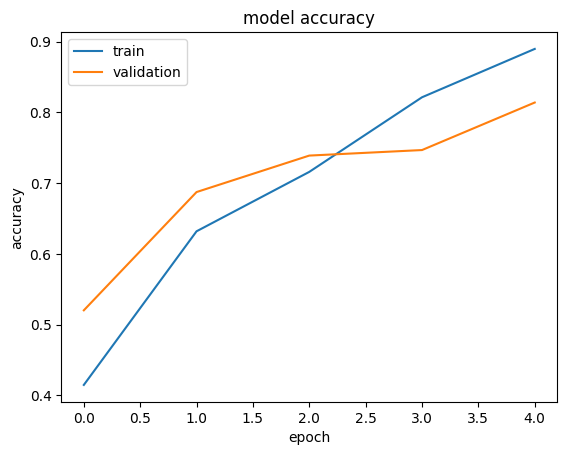

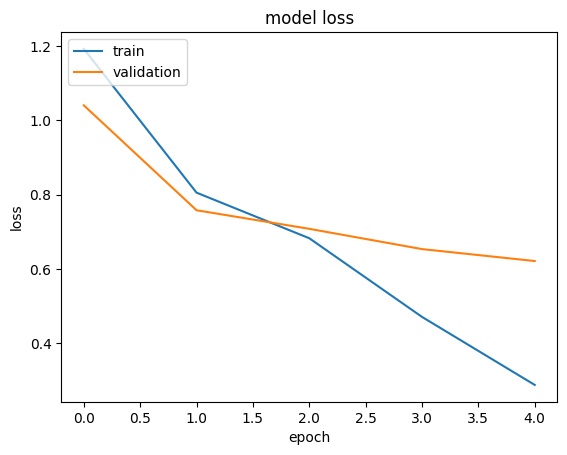

In [29]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Print classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print('\nClassification Report:')
print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))
cm = confusion_matrix(y_true_classes, y_pred_classes)

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 69s 859ms/step - accuracy: 0.9245 - loss: 0.2080 - val_accuracy: 0.8328 - val_loss: 0.6808
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9612 - loss: 0.1180 - val_accuracy: 0.8016 - val_loss: 0.6494
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 79s 982ms/step - accuracy: 0.9541 - loss: 0.1221 - val_accuracy: 0.8094 - val_loss: 0.9090
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9811 - loss: 0.0580 - val_accuracy: 0.8328 - val_loss: 0.7496
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.9897 - loss: 0.0308 - val_accuracy: 0.8516 - val_loss: 0.7514
25/25 - 6s - 228ms/step - accuracy: 0.8825 - loss: 0.5054

Test accuracy: 0.8824999928474426
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step

Classification Report:
              precision    recall  f1-score   support

        agri       0.91      0.81      0.86       209
  barrenland       0.85      0.92      0.88       213
   grassland       0.86      0.86      0.86     

In [31]:
print(cm)

[[170  20  10   9]
 [  3 196  11   3]
 [ 11  13 167   3]
 [  3   1   7 173]]


In [32]:
images_path = '/Users/ginger/Developer/python/Projects/sar-colorization/Data/images_full.npy'
labels_path = '/Users/ginger/Developer/python/Projects/sar-colorization/Data/labels_full.npy'
images, labels = load_data(images_path, labels_path)

# Preprocess data
images, labels, le = preprocess_data(images, labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create and compile the model
input_shape = X_train.shape[1:]
num_classes = len(le.classes_)
model_full = create_model(input_shape, num_classes)

# Train the model


/Users/ginger/Developer/python/Projects/sar-colorization/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Print classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print('\nClassification Report:')
print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

Epoch 1/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - accuracy: 0.8620 - loss: 0.4422 - val_accuracy: 0.9031 - val_loss: 0.2553
Epoch 2/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 357s 1s/step - accuracy: 0.9465 - loss: 0.1562 - val_accuracy: 0.9488 - val_loss: 0.1518
Epoch 3/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 363s 1s/step - accuracy: 0.9780 - loss: 0.0705 - val_accuracy: 0.9539 - val_loss: 0.1732
Epoch 4/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.9939 - loss: 0.0213 - val_accuracy: 0.9504 - val_loss: 0.1752
Epoch 5/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.9892 - loss: 0.0321 - val_accuracy: 0.9414 - val_loss: 0.2139
100/100 - 24s - 236ms/step - accuracy: 0.9469 - loss: 0.2239

Test accuracy: 0.9468749761581421
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 255ms/step

Classification Report:
              precision    recall  f1-score   support

        agri       0.98      0.87      0.92       767
  barrenland       0.95      0.97      0.96       837
   grassland       0.93      0.97

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


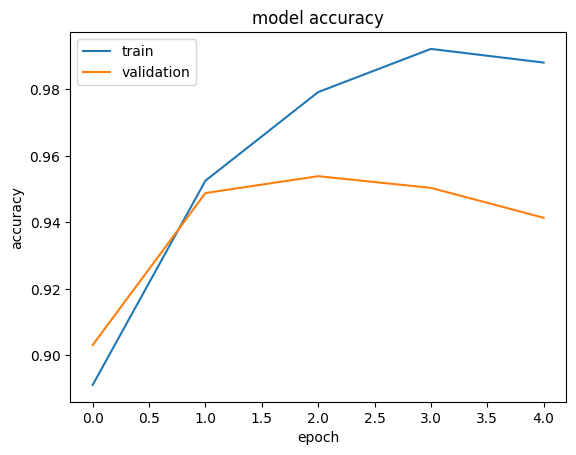

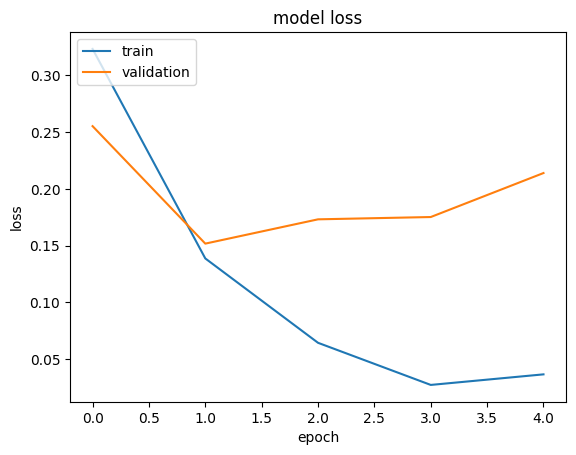

In [34]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [35]:
import pickle
pickle.dump(model_full, open('saved/model.p', 'wb'))

In [37]:
model_full_load = pickle.load(open('saved/model.p', 'rb'))

/Users/ginger/Developer/python/Projects/sar-colorization/venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [40]:
model_full_load.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 124, 124, 64)   │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 58, 58, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 215296)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │    13,779,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,744,654 (159.24 MB)

 Trainable params: 13,914,884 (53.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,829,770 (106.16 MB)

In [43]:
model_full_load.get_weights()

[array([[[[ 4.74191755e-02, -1.19163148e-01,  2.74598002e-02,
           -6.09474033e-02, -5.99048585e-02, -1.21709749e-01,
           -6.06244802e-03,  9.93820578e-02,  5.95912635e-02,
            1.11476645e-01,  7.83838630e-02,  2.55863667e-02,
            1.33259296e-02,  9.21116322e-02,  1.40984073e-01,
           -1.26249671e-01, -1.39420927e-02, -1.38412341e-01,
           -1.24745980e-01,  9.85652655e-02, -1.54795051e-02,
           -1.30895674e-02,  3.89158726e-04,  9.01773721e-02,
            6.54533356e-02,  9.10523683e-02, -3.98324728e-02,
           -1.06353387e-01,  1.93640441e-02, -1.06454641e-02,
           -8.95726159e-02,  4.73188907e-02]],
 
         [[-6.74979240e-02, -1.18808314e-01, -7.38962665e-02,
            1.05182827e-03,  3.04120630e-02, -6.63523972e-02,
           -1.07889809e-01, -1.25366837e-01,  1.25924721e-01,
            4.74214107e-02,  3.54278982e-02,  4.55605537e-02,
           -1.21601477e-01,  1.18761584e-01,  3.85251641e-03,
            6.8803980

In [45]:
model_full.predict(X_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step


array([[0.24016432, 0.2420799 , 0.26380438, 0.25395137],
       [0.23187454, 0.24885407, 0.26464793, 0.2546234 ],
       [0.24162817, 0.24672371, 0.26072228, 0.25092587],
       ...,
       [0.23726678, 0.24772137, 0.26254264, 0.25246924],
       [0.24371113, 0.24148342, 0.266808  , 0.24799745],
       [0.23769394, 0.24967338, 0.26635736, 0.24627517]], dtype=float32)

In [46]:
model_full_load.predict(X_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step


array([[0.24016432, 0.2420799 , 0.26380438, 0.25395137],
       [0.23187454, 0.24885407, 0.26464793, 0.2546234 ],
       [0.24162817, 0.24672371, 0.26072228, 0.25092587],
       ...,
       [0.23726678, 0.24772137, 0.26254264, 0.25246924],
       [0.24371113, 0.24148342, 0.266808  , 0.24799745],
       [0.23769394, 0.24967338, 0.26635736, 0.24627517]], dtype=float32)